In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/computer-science-students-career-prediction/cs_students.csv


# **Exploring the Dataframe**

In [2]:
df = pd.read_csv("/kaggle/input/computer-science-students-career-prediction/cs_students.csv")

In [3]:
import warnings

# Suppress specific deprecation and future warnings
warnings.filterwarnings("ignore")

In [4]:
df.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [5]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n")
    
    return df.describe().transpose()

# Call the function
get_df_info(df)


Shape of DataFrame:  (180, 12)

Columns in DataFrame:  ['Student ID', 'Name', 'Gender', 'Age', 'GPA', 'Major', 'Interested Domain', 'Projects', 'Future Career', 'Python', 'SQL', 'Java']

Data types of columns:
 Student ID             int64
Name                  object
Gender                object
Age                    int64
GPA                  float64
Major                 object
Interested Domain     object
Projects              object
Future Career         object
Python                object
SQL                   object
Java                  object
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4 

,count,mean,std,min,25%,50%,75%,max
Student ID,180.0,90.500000,52.105662,1.0,45.75,90.5,135.25,180.0
Age,180.0,22.116667,2.823040,20.0,21.00,22.0,22.25,37.0
GPA,180.0,3.615000,0.177341,3.2,3.50,3.6,3.70,3.9


# **Data Visualization**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

**1. Distribution of GPA**

<Axes: xlabel='GPA', ylabel='Count'>

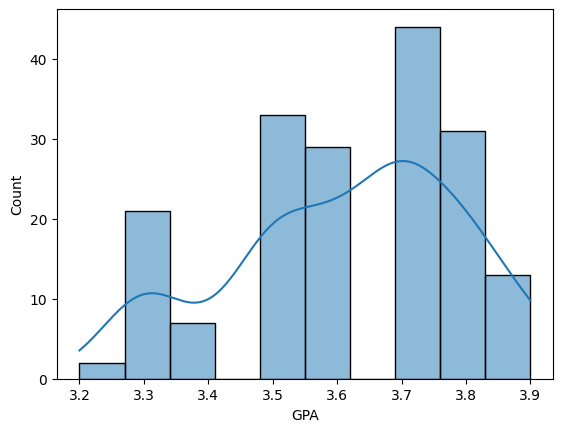

In [7]:
sns.histplot(df['GPA'], kde=True)

**2. Age Distribution**

<Axes: xlabel='Age', ylabel='Count'>

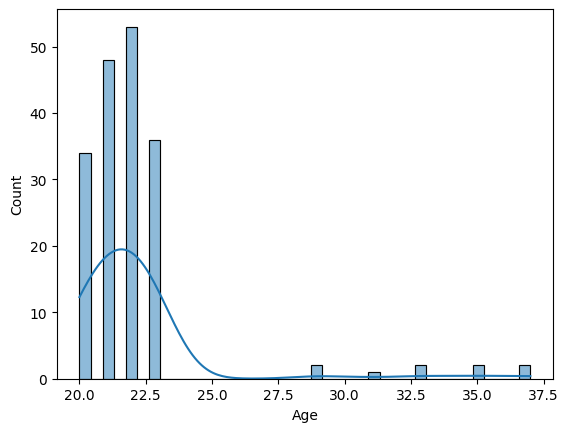

In [8]:
sns.histplot(df['Age'], kde=True)

**3. Gender Distribution**

<Axes: xlabel='Gender', ylabel='count'>

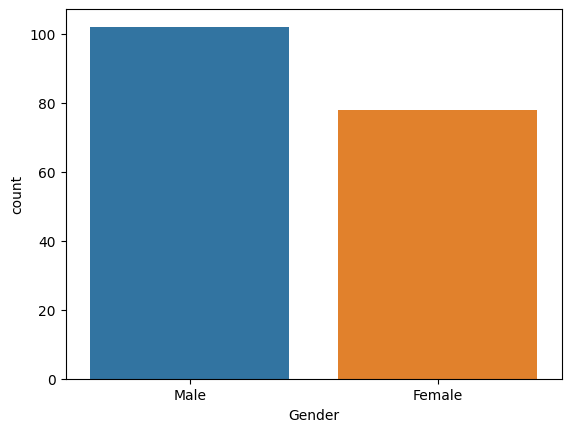

In [9]:
sns.countplot(x='Gender', data=df)

**4. Interested Domain**

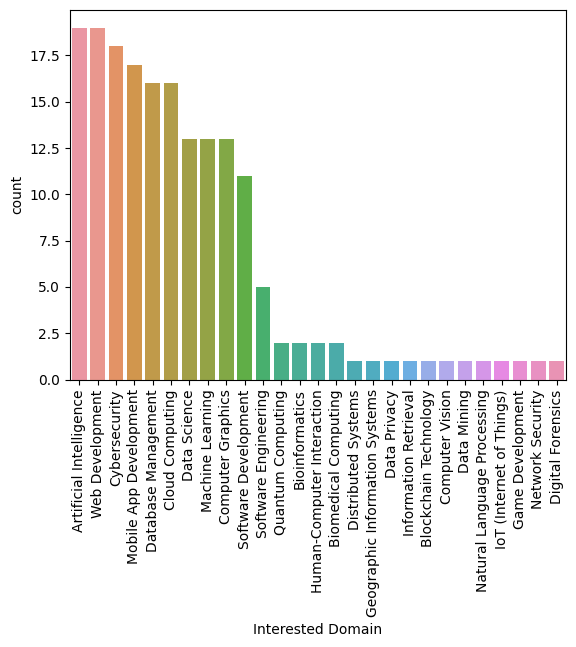

In [10]:
order = df['Interested Domain'].value_counts().index

# Create the count plot with the specified order
sns.countplot(x='Interested Domain', data=df, order=order)
plt.xticks(rotation=90)
plt.show()

**5. Future Career**

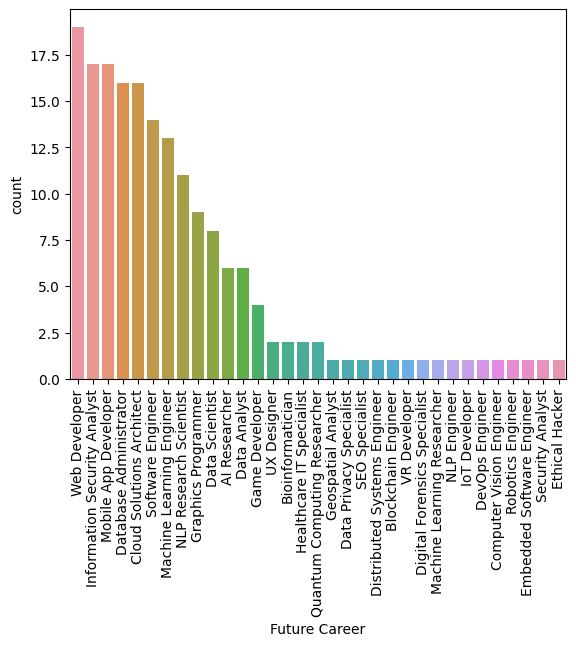

In [11]:
# Get the count of each category in ascending order
order = df['Future Career'].value_counts().index

# Create the count plot with the specified order
sns.countplot(x='Future Career', data=df, order=order)
plt.xticks(rotation=90)
plt.show()

**6. Programming Skills (Python, SQL, Java)**

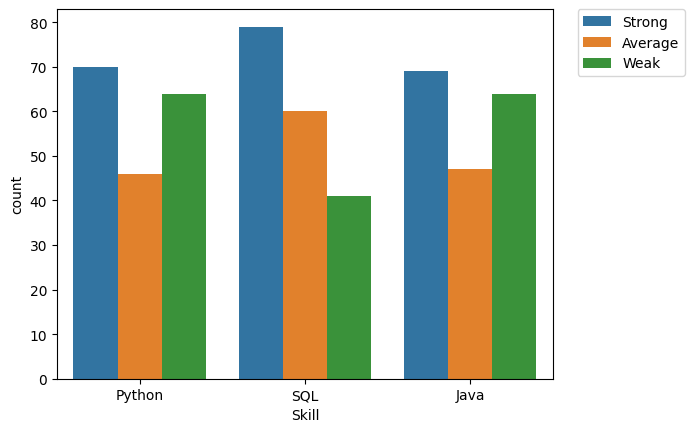

In [12]:
# Melt the dataframe to create a single column for the categories
df_melted = pd.melt(df, value_vars=['Python', 'SQL', 'Java'], var_name='Skill', value_name='Level')

# Create the count plot with hue
sns.countplot(x='Skill', hue='Level', data=df_melted)

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

**7. Relationship between GPA and Age**

<Axes: xlabel='Age', ylabel='GPA'>

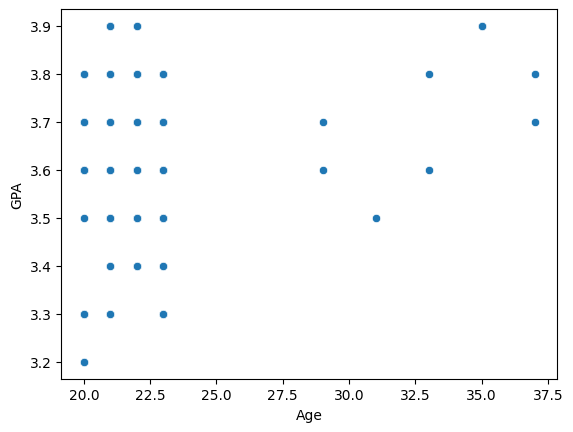

In [13]:
sns.scatterplot(x='Age', y='GPA', data=df)

**8. Gender vs Programming Skills**

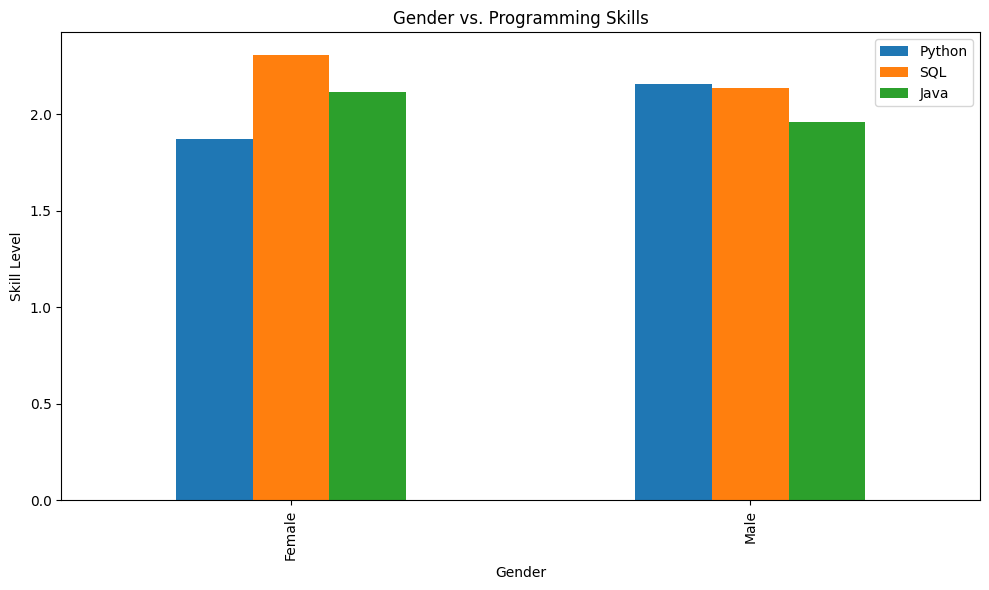

In [14]:
# Create a mapping for the skill levels
skill_level_mapping = {'Weak': 1, 'Average': 2, 'Strong': 3}

# Apply the mapping to the 'Python', 'SQL', and 'Java' columns
df['Python'] = df['Python'].map(skill_level_mapping)
df['SQL'] = df['SQL'].map(skill_level_mapping)
df['Java'] = df['Java'].map(skill_level_mapping)

# Group the data by gender and calculate the mean skill levels
df_grouped = df.groupby('Gender')[['Python', 'SQL', 'Java']].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the grouped bar chart
df_grouped.plot(kind='bar', ax=ax)

# Set the chart title and axis labels
ax.set_title('Gender vs. Programming Skills')
ax.set_xlabel('Gender')
ax.set_ylabel('Skill Level')
ax.set_xticklabels(['Female', 'Male'])
ax.legend(['Python', 'SQL', 'Java'])

plt.tight_layout()
plt.show()

# **Predictive Analytics**

In [15]:
X = df.drop(['Student ID', 'Name', 'Major', 'Future Career'], axis=1)
y = df['Future Career']

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, matthews_corrcoef, confusion_matrix

In [17]:
# Handle categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

In [18]:
# Scale numerical variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Apply a suitable Machine Learning algorithm
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
mcc = matthews_corrcoef(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [22]:
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Matthews Correlation Coefficient: {mcc:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.81
F1 Score: 0.60
Matthews Correlation Coefficient: 0.79
Classification Report:
                              precision    recall  f1-score   support

               AI Researcher       1.00      1.00      1.00         1
            Bioinformatician       0.00      0.00      0.00         1
   Cloud Solutions Architect       0.71      1.00      0.83         5
                Data Analyst       1.00      1.00      1.00         1
              Data Scientist       1.00      1.00      1.00         1
      Database Administrator       0.40      1.00      0.57         2
Distributed Systems Engineer       0.00      0.00      0.00         1
              Ethical Hacker       0.00      0.00      0.00         1
              Game Developer       0.50      1.00      0.67         1
         Graphics Programmer       0.50      1.00      0.67         1
    Healthcare IT Specialist       0.00      0.00      0.00         1
Information Security Analyst       1.00      1.00      1.00        

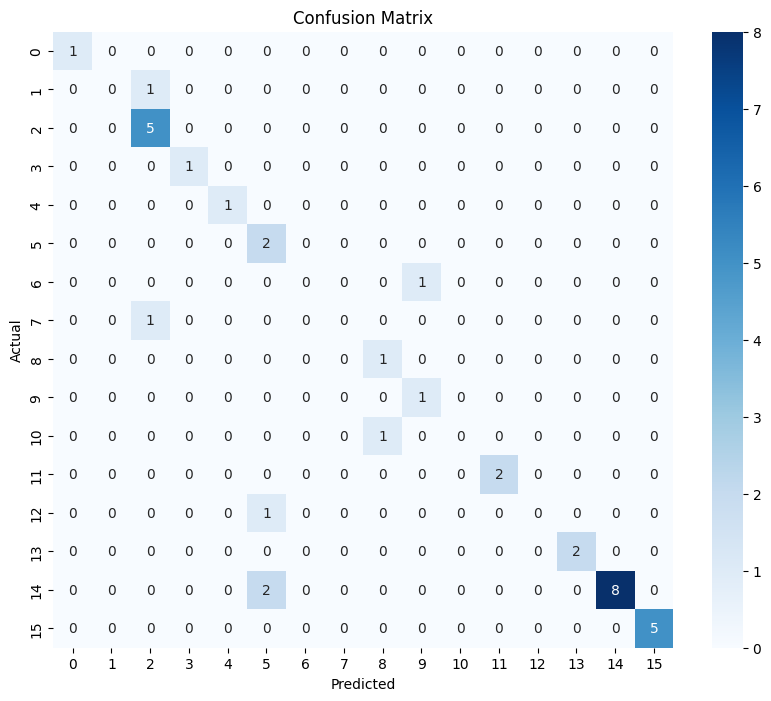

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

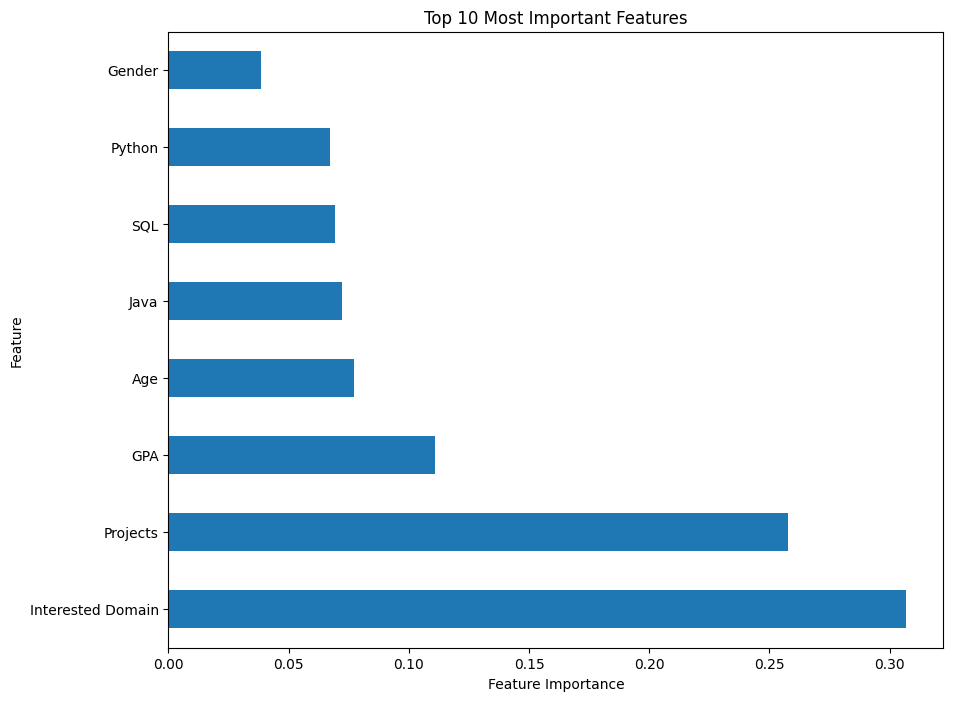

In [24]:
# Plot the feature importance
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(model.feature_importances_, index=df.drop(['Student ID', 'Name', 'Major', 'Future Career'], axis=1).columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()